In [111]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# deep learning specific imports
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# metrics imports
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [97]:
# Fetch datasets
dataset = fetch_openml('mnist_784', parser='auto')
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [98]:
X, y = pd.DataFrame(dataset['data'], dtype=np.uint8), pd.DataFrame(dataset['target'])
# Print shape of input and target data
X.shape, y.shape

((70000, 784), (70000, 1))

In [99]:
# Define target vector Y
y_ohe = pd.get_dummies(y)
y_ohe.head()

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [100]:
X.min().min(), X.max().max() # scaling function would be .1/255

(0, 255)

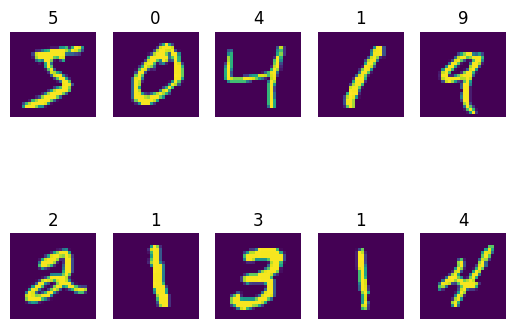

In [101]:
# Display first ten images of the dataset
fig, ax = plt.subplots(2, 5)
for idx in range(10):
    img = X.iloc[idx].to_numpy()
    img = np.reshape(img, (28, 28))
    ax[idx // 5, idx % 5].imshow(img)
    ax[idx // 5, idx % 5].set_title(y.iloc[idx].to_numpy()[0])
    ax[idx // 5, idx % 5].set_axis_off()
plt.show()

In [102]:
# Transform the data
X_scaled = X / X.max().max() # divide by maximum of each column for better scaling
X.max().max(), X.min().min()

(255, 0)

In [108]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ohe, train_size=0.7, shuffle=False)

In [109]:
# Training the MLP Classifier
model = MLPClassifier([32], max_iter=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


array(['4', '9', '4', ..., '4', '5', '6'], dtype='<U1')

In [112]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(precision_recall_fscore_support(y_test, y_pred))

Accuracy Score: 0.9482380952380952
(array([0.96354167, 0.97869565, 0.93969144, 0.93271462, 0.94772507,
       0.95086393, 0.95692609, 0.95423341, 0.91740967, 0.93852256]), array([0.97930703, 0.97572605, 0.94677343, 0.93271462, 0.95465627,
       0.92343996, 0.9673429 , 0.94046008, 0.94262295, 0.91582003]), array([0.97136038, 0.9772086 , 0.94321915, 0.93271462, 0.95117804,
       0.93695132, 0.9621063 , 0.94729668, 0.92984542, 0.92703232]), array([2078, 2307, 2123, 2155, 2051, 1907, 2021, 2217, 2074, 2067]))
